In [5]:
import matplotlib.pyplot as plt 
from scipy import sparse as sps

In [6]:
sim_csr = sps.load_npz("./hashtag_similarity_csr.npz")

In [149]:
sim_csr
sim_dense = sim_csr.todense()

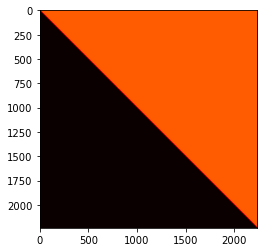

In [105]:
plt.imshow(sim_dense, cmap='hot', interpolation='gaussian')
plt.show()

The similarity matrix is upper diagonal as expected! Not so surprising.

In [11]:
import seaborn as sns

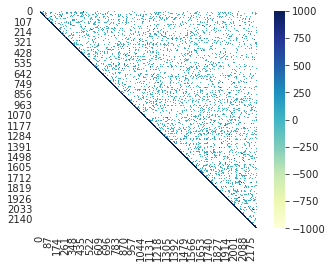

In [35]:
sim_augmented = sim_csr * 1000
sim_a_d = sim_augmented.todense()

mask = sim_dense < 0.01
with sns.axes_style("white"):
    ax = sns.heatmap(sim_a_d, mask = mask, vmax=1000, square=True,  cmap="YlGnBu")
    plt.show()

In [31]:
sim_dense[0,1]

0.44243323676378876

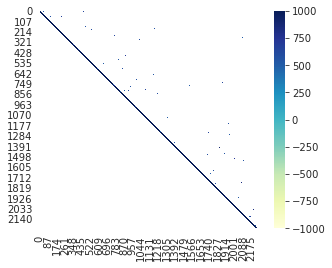

In [106]:
sim_augmented = sim_csr * 1000
sim_a_d = sim_augmented.todense()

mask = sim_dense < 0.5
with sns.axes_style("white"):
    ax = sns.heatmap(sim_a_d, mask = mask, vmax=1000, square=True,  cmap="YlGnBu")
    plt.show()

A pie chart indicating the percentage of different ranges of similarity.

7
[0, 3860, 943, 639, 198, 225, 127, 45]
['< 0.01', '< 0.05', '< 0.1', '< 0.2', '< 0.3', '< 0.5', '< 0.8', '> 0.8']


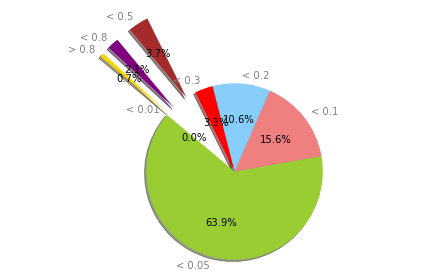

In [157]:
labels = ['< 0.01', '< 0.05', '< 0.1', '< 0.2', '< 0.3', '< 0.5', '< 0.8']
ranges = 0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 0.8
sizes = []
print(len(labels))
mask = sim_dense < ranges[0]
previous = len(sim_dense[mask].tolist()[0])
for i in range(0, len(labels)):
    mask = sim_dense < ranges[i]
    current = len(sim_dense[mask].tolist()[0])
    sizes.append(current-previous)
    previous = current
last = sim_dense > 0.8
sizes.append(len(sim_dense[last].tolist()[0])-sim_csr.shape[0])
labels.append('> 0.8')
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','red','brown','purple']
print(sizes)
print(labels)
# Plot
fig1, ax1 = plt.subplots()

explode = (0,0,0,0,0,1,1,1)

patches, texts, autotexts = \
                ax1.pie(sizes, labels=labels, explode=explode,
                        colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

for text in texts:
    text.set_color('grey')
for autotext in autotexts:
    autotext.set_color('black')
fig1.set_facecolor('white')
ax1.axis('equal')  
plt.tight_layout()
plt.show()

The above pie chart shows the percentace of hashtags with similarity within a cestain range.
Notice that '< 0.1' denotes the percentage of hashtags with similarity between '0.05' (the previous one) and '0.1'.

<BarContainer object of 8 artists>

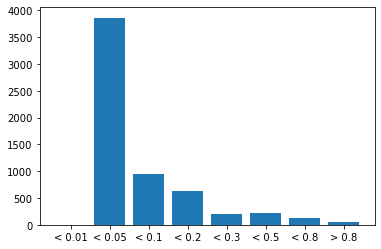

In [159]:
plt.bar(x = labels, y = 0, height = sizes)

The most similar (with similarity > 0.8) hashtags are:

In [185]:
condition = sim_dense > 0.8
condition = np.logical_and(condition, sim_dense < 1)
row_col = np.where(condition)
row_set = row_col[0]
col_set = row_col[1]

for i in range(0,len(row_set)):
    print(f"[{row_set[i]},{col_set[i]}]")

[199,200]
[272,273]
[313,314]
[422,423]
[486,487]
[528,529]
[541,542]
[541,543]
[542,543]
[626,627]
[796,797]
[796,798]
[796,799]
[796,800]
[796,801]
[796,802]
[797,798]
[797,799]
[797,800]
[797,801]
[797,802]
[798,799]
[798,800]
[798,801]
[798,802]
[799,800]
[799,801]
[799,802]
[800,801]
[800,802]
[801,802]
[1047,1048]
[1303,1304]
[1405,1851]
[1446,1447]
[1535,1536]
[1703,1704]
[1720,1721]
[1769,2074]
[1806,1807]
[2040,2195]
[2062,2063]
[2077,2078]
[2209,2210]
[2220,2221]


A lot of them are sequential, how is that?
It could be because Hashtags are used together and have almost the same meaning.

In [102]:
e = sim_dense > 0.5
sim_dense[e]

matrix([[1.        , 1.        , 0.53845121, ..., 1.        , 1.        ,
         1.        ]])

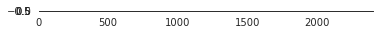

In [104]:
mask = sim_dense < 0.5
with sns.axes_style("white"):
    plt.imshow(sim_dense[e], cmap='hot', interpolation='nearest')
    plt.show()

In [192]:
# first we have to compute the counts for every hashtag, and so we need to make a copule of tricks
import TwitterData as tw
import pandas as pd

train_index_column_c = "training_mapped_tweet_features_tweet_id"

tweet_df = pd.DataFrame()

tweet_t = tw.get_resource(train_index_column_c)

col_name = "tweet_id"
tweet_df[col_name] = tweet_t[train_index_column_c]

tweet_df

,tweet_id
0,0
1,1
2,2
3,3
4,4
...,...
148075233,73549796
148075234,73549797
148075235,2581571
148075236,15200993


In [193]:
train_index_column_c = "training_mapped_tweet_features_hashtags"

hashtags_df = pd.DataFrame()

hashtags_t = tw.get_resource(train_index_column_c)

col_name_h = "Hashtag_id"
hashtags_df[col_name] = hashtags_t[train_index_column_c]
max_id = 2554184

In [194]:
%%time
counts = [0 for i in range(0,int(max_id))]

import numpy as np

def count(array):
    for hashtag_id in array:
        counts[hashtag_id] = counts[hashtag_id] + 1
        # For strange reason, but it is needed this fucking return
    return 1

unique = ~tweet_df.duplicated()
tags_to_be_processed = hashtags_df[unique][col_name].dropna()
tags_to_be_processed.map(count)

counts

CPU times: user 2min 17s, sys: 16.9 s, total: 2min 34s
Wall time: 2min 48s


[51247,
 115986,
 785,
 385,
 504,
 253,
 470,
 40,
 2,
 89,
 2,
 3,
 63,
 75,
 117,
 13,
 4,
 2724,
 409,
 2022,
 50,
 40,
 34,
 38,
 20,
 20,
 15,
 15,
 504,
 120,
 14,
 171,
 2118,
 2831,
 2,
 2,
 1892,
 217,
 2819,
 133,
 39,
 1899,
 21,
 4845,
 166,
 7594,
 21321,
 48362,
 1455,
 31,
 484,
 27,
 47,
 455,
 459,
 16906,
 3,
 141,
 20,
 15,
 7,
 20924,
 1,
 19,
 1109,
 3558,
 253,
 14,
 139,
 115,
 38,
 127,
 60,
 10,
 110,
 40,
 128,
 34,
 45,
 10,
 172,
 56,
 1156,
 1797,
 898,
 25,
 3811,
 19,
 1174,
 10,
 7745,
 91557,
 9828,
 5805,
 48085,
 3,
 5,
 9,
 356,
 4557,
 46,
 39,
 147,
 36,
 3,
 1014,
 59,
 3,
 4840,
 930,
 994,
 1247,
 769,
 185,
 1028,
 35,
 959,
 290,
 1,
 29,
 8443,
 868,
 17325,
 17118,
 1079,
 2254,
 50,
 1902,
 28,
 116,
 302,
 5650,
 2706,
 68024,
 777,
 62613,
 3968,
 96,
 32,
 346,
 4,
 449,
 2825,
 3194,
 12,
 1071,
 140,
 3307,
 26665,
 15989,
 17536,
 763,
 68,
 2456,
 1411,
 104,
 3150,
 24093,
 79,
 19,
 4052,
 650,
 15,
 22,
 1,
 45,
 166,
 1958,
 3,


In [195]:
%%time
c_df = pd.DataFrame()
c_df["h"] = counts
c_df = c_df.astype(int)

CPU times: user 4.07 s, sys: 147 ms, total: 4.22 s
Wall time: 4.67 s


In [196]:
threshold = 1000
significants = c_df["h"][c_df["h"] > threshold]
significants

0         51247
1        115986
17         2724
19         2022
32         2118
          ...  
71407      1264
71495      1003
71951      1038
81854      1079
88130      1022
Name: h, Length: 2236, dtype: int64

In [197]:
mapping = significants.reset_index()
mapping

,index,h
0,0,51247
1,1,115986
2,17,2724
3,19,2022
4,32,2118
...,...,...
2231,71407,1264
2232,71495,1003
2233,71951,1038
2234,81854,1079


Here there are the "real" hashtags id.

In [198]:
col = "index"
for i in range(0,len(row_set)):
    print(f"[{mapping[col].iloc[row_set[i]]},{mapping[col].iloc[col_set[i]]}]")

[761,762]
[1032,1033]
[1287,1288]
[1718,1719]
[2029,2030]
[2149,2150]
[2230,2231]
[2230,2232]
[2231,2232]
[2683,2684]
[3791,3792]
[3791,3794]
[3791,3795]
[3791,3796]
[3791,3797]
[3791,3798]
[3792,3794]
[3792,3795]
[3792,3796]
[3792,3797]
[3792,3798]
[3794,3795]
[3794,3796]
[3794,3797]
[3794,3798]
[3795,3796]
[3795,3797]
[3795,3798]
[3796,3797]
[3796,3798]
[3797,3798]
[5640,5641]
[8467,8468]
[9467,18155]
[10035,10036]
[11332,11334]
[14291,14292]
[14829,14830]
[16008,28679]
[16860,16861]
[26456,47544]
[28086,28087]
[28724,28725]
[54742,54743]
[60776,60777]
